In [1]:
#import library
import torch 
import torch.nn as nn
import torch.optim as opt
from torchvision import models

### VGG16 Architecture
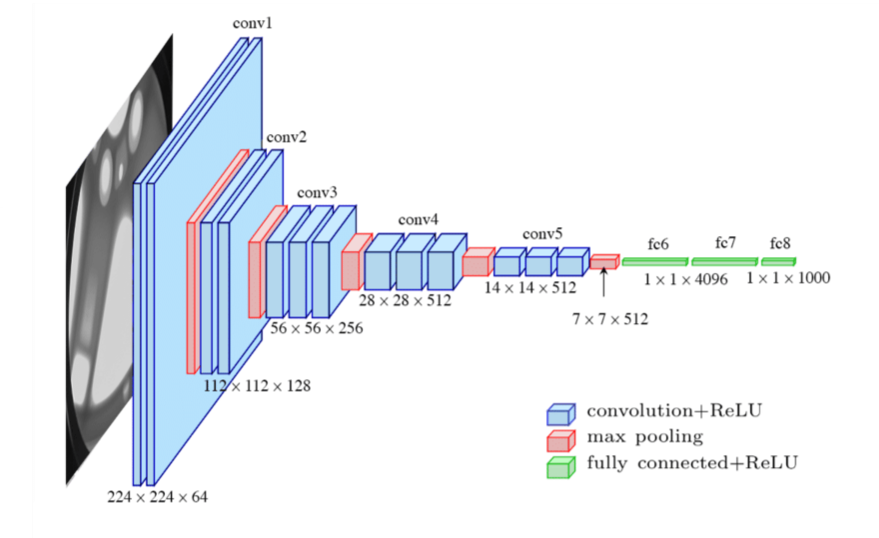

### VGG16 parameters
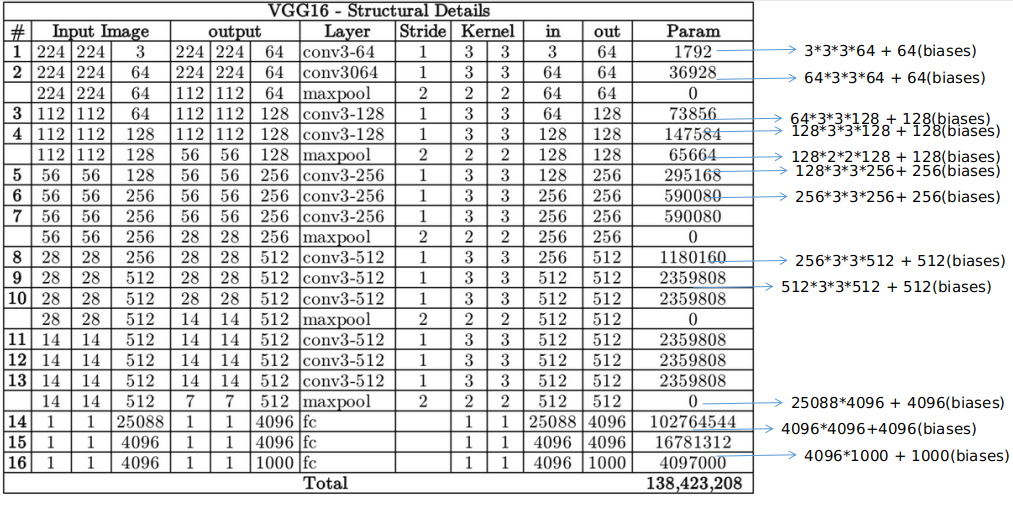

### Why must a CNN have a fixed input size when having fully-connected layers at the end? 
---> Because fully-connected layers train weight to connect every dimension of the input with every dimension of the output ==> the number of weight is determined. ===> the input size of the highest convolutional layer is fixed ===> the input size of the second highest convolutional layer is fixed ===> ...==> ...==> input layer must be constant


## Backbone VGG16 + 1 FC (4096)

In [2]:
 VGG16=[64,64,"M",128,128,"M",256,256,256,"M",512,512,512,"M",512,512,512,"M",]

In [3]:
class VGG_net(nn.Module):
    def __init__(self, channels=3, num_classes=1000):
        super(VGG_net, self).__init__()
        self.channels = channels
        self.conv_layers = self.backbone(VGG16)

        self.fcs = nn.Sequential(
            nn.Linear(7*7*512, 4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
#             nn.Linear(4096, 4096),
#             nn.ReLU(),
#             nn.Dropout(p=0.5),
#             nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fcs(x)
        return x

    def backbone(self, architecture):
        layers = []
        channels = self.channels

        for ch in architecture:
            if type(ch) == int:
                layers += [
                    nn.Conv2d(
                        in_channels=channels,
                        out_channels=ch,
                        kernel_size=(3, 3),
                        stride=(1, 1),
                        padding=(1, 1),
                    ),
                    nn.BatchNorm2d(ch),
                    nn.ReLU(),
                ]
                channels = ch
            elif ch == "M":
                layers += [nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))]

        return nn.Sequential(*layers)


In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = VGG_net(channels=3, num_classes=1000).to(device)
print(model)
inpt = torch.randn(3, 3, 224, 224).to(device)
print(model(inpt).shape)

VGG_net(
  (conv_layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3),